In [1]:
if 0:
    # HIDE CELL
    import deps
    from importlib import reload
    reload(deps)

    alldat, dat_LFP, dat_ST = deps.get_data()
    dat = alldat[1]
    sp, neu, trial_starts = deps.convert_raster_to_spiketimes(dat)
    events_df = deps.convert_events_to_dataframe(dat, trial_starts,
                                            event_names=('gocue', 'response_time','feedback_time'),
                                            condition_names=('response','contrast_right','contrast_left','feedback_type'))

    spykes_times = deps.spykes_get_times(sp, neu)

In [2]:
if 0:
    for event_name in events_df.columns[events_df.columns.str.contains('time')]:
        for condition_name in events_df.columns[~events_df.columns.str.contains('time')]:
            1
    _, all_psth = deps.get_psth(spikes=spykes_times,
                       spykes_df=events_df,
                       event=event_name, 
                       conditions=condition_name,
                       window=[-500, 1500], 
                       bin_size=10,
                                #fr_thr=0,
                       )
    # Make psth
    xar=deps.spyke2xar(all_psth)

In [3]:
if 0:
    reload(deps)
    # Cluster
    df,df_tidy,index=deps.cluster(xar,plotose=False)

    #df = xar.to_dataframe().reset_index()

In [4]:
if 0:
    import seaborn as sns
    import matplotlib.pylab as plt
    from matplotlib import colors
    plt.figure(figsize=(20,20))
    sns.heatmap(df_tidy, robust=True,
            center=True,
            #norm=colors.SymLogNorm(0.03),
            );

In [5]:
if 0:
    # Altair
    import altair as alt
    df['Neuron']=df['Neuron']
    alt.data_transformers.disable_max_rows()
    chart=alt.Chart(df).mark_rect().encode(
        x='Time:O',
        y='Neuron:O',
        color=alt.Color(f'{xar.name}:Q',scale=alt.Scale(scheme='purpleorange'),)
    ).properties(height=550,width=700)#.facet(column=condition_name)
    chart

In [6]:
if 0:
    # Altair
    import altair as alt
    alt.data_transformers.disable_max_rows()
    chart=alt.Chart(df).mark_square().encode(
        x='Time:O',
        y='Neuron:O',
        color=alt.Color(f'{xar.name}:Q',scale=alt.Scale(scheme='purpleorange'),)
    ).properties(height=550,width=400).facet(column=condition_name)
    chart

In [7]:
if 0:
    from holoviews.operation.datashader import rasterize
    import numpy as np
    import pandas as pd
    import holoviews as hv

    from bokeh.plotting import show
    import holoviews as hv
    import hvplot.pandas  # noqa
    %output size=320


    #df['time_feedback']=df['time_feedback']+df['time_feedback'].min()+1
    #rasterize(hv.Image(df_tidy.values,['Time','Neuron'],'time_feedback'), dynamic=True)
    #rasterize(hv.Image(df_tidy,['Time','Neuron'],'time_feedback'), dynamic=True)
    #rasterize(hv.QuadMesh(df_tidy,['Time','Neuron'],'time_feedback'), dynamic=True)
    #dfz=df_tidy.xs(1,level='feedback_type')
    dfz=df_tidy.copy()
    #dfz[dfz>4]=4
    #dfz+dfz.min().min()
    rasterize(hv.Image((df_tidy.columns.values,range(df_tidy.shape[0]), df_tidy.values)
    ).options(invert_yaxis=True,cmap='Plasma',logz=False),
              dynamic=False)
    #dfz.min()
    hv.Image((df_tidy.columns.values,range(df_tidy.shape[0]), df_tidy.values)
            ).options(invert_yaxis=True,cmap='Plasma')
    hv.HeatMap(df,['Time','Neuron'],'time_feedback')


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
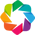

/home/m/anaconda3/envs/dj/lib/python3.8/site-packages/holoviews/plotting/util.py:685: MatplotlibDeprecationWarning: The global colormaps dictionary is no longer considered public API.
  [cmap for cmap in cm.cmap_d if not


:AdjointLayout
   :HeatMap   [z,x]   (y)
   :Path   [a,b]
   :Path   [a,b]

In [8]:
import numpy as np
import pandas as pd
import holoviews as hv

from scipy.cluster.hierarchy import linkage, dendrogram

hv.notebook_extension('bokeh')
%opts Path.Dendrogram (line_color='black') [xaxis=None yaxis=None show_grid=False show_title=False show_frame=False border=0]

def compute_linkage(dataset, dim, vdim):
    arrays, labels = [], []
    for k, v in dataset.groupby(dim, container_type=list, group_type=hv.Dataset):
        labels.append(k)
        arrays.append(v.dimension_values(vdim))
    X = np.vstack(arrays)
    X = np.ma.array(X, mask=np.logical_not(np.isfinite(X)))
    Z = linkage(X)
    ddata = dendrogram(Z, labels=labels, no_plot=True)
    ddata['mh'] = np.max(Z[:, 2])
    return ddata

def get_dendrogram(dataset, dim, vdim):
    if not isinstance(dim, list): dim = [dim]
    kdims = dataset.kdims
    dataset = hv.Dataset(dataset)
    sort_dims, dendros = [], []
    for i, d in enumerate(dim):
        ddata = compute_linkage(dataset, d, vdim)
        mh = ddata['mh']
        order = [ddata['ivl'].index(v) for v in dataset.dimension_values(d)][::-1]
        sort_dim = 'sort%s' % i
        dataset = dataset.add_dimension(sort_dim, 0, order)
        sort_dims.append(sort_dim)
        ivw = len(ddata['ivl']) * 10
        dvw = mh + mh * 0.05
        extents = (0, 0, ivw, dvw)
        dendro = hv.Path(zip(ddata['icoord'], ddata['dcoord']), kdims=['a', 'b'], group='Dendrogram',
                         extents=extents)
        dendros.append(dendro)
    opts = [dict(width=80), dict(height=80)]
    if len(sort_dims) == 1: sort_dims = kdims[:1] + sort_dims
    dataset = hv.HeatMap(dataset.sort(sort_dims).reindex(kdims))
    for dendro, opt in zip(dendros, opts):
        dataset = dataset << dendro(plot=opt)
    return dataset

%opts Layout [shared_axes=False] Path {+axiswise} HeatMap [border=0]
ndoverlay = hv.NdOverlay({i: hv.Curve([(chr(65+j), np.random.rand()) for j in range(10)])
                          for i in range(5)}, kdims=['z'])
dataset = hv.Dataset(ndoverlay.dframe(), vdims=['y'])

get_dendrogram(dataset, ['x', 'z'], 'y')


In [9]:
# brain area
if 0:
    dat['brain_area']

    _, all_psth = deps.get_psth(spikes=spykes_times,
                       spykes_df=events_df,
                       event=event_name, 
                       conditions=condition_name,
                       window=[-500, 1500], 
                       bin_size=10,
                                fr_thr=0,
                       )

    # Make psth
    xar=deps.spyke2xar(all_psth)
    import seaborn as sns
    value_name = xar.name
    condition_name = xar.dims[0]
    df = xar.to_dataframe().reset_index()
    df.shape,dat['brain_area'].shape
    #xar['brain_area']=dat['brain_area']

    dat_ST

    all_psth['data'][0].shape

    xar

    df = df.pivot(index=['Neuron', condition_name],
                  columns='Time',
                  values=value_name)

    # Cluster conditions together, plot them (also together)
    g = sns.clustermap(df,
                       z_score=False,
                       figsize=[20, 20],
                       col_cluster=False,
                       # standard_scale=1,
                       metric="correlation",
                       center=True,
                       #row_colors=dat['brain_area'], #TODO
                       robust=True)

In [10]:
if 0:
    # Plot using sns
    value_name=xar.name
    for condition in df[condition_name].unique():
        # Pivot if necessary
        df1=df.pivot(index=['Neuron',condition_name], 
                                              columns='Time',
                                              values=value_name)
        deps.heatmap(df1.xs(condition,level=condition_name));plt.show()    

In [11]:
## Examples of datashading from holoviews
if 0:
    from holoviews.operation.datashader import rasterize
    import numpy as np
    import pandas as pd
    import holoviews as hv

    from bokeh.plotting import show
    import holoviews as hv
    import hvplot.pandas  # noqa
    %output size=320


    a, b = np.random.randn(1000, 2).T
    df = pd.DataFrame({'a': a*10, 'b': b}, columns=['a', 'b'])
    rasterize(hv.Scatter(df), width=10, height=10, dynamic=False)

    from holoviews.operation.datashader import rasterize

    a, b = np.random.randn(1000, 2).T
    dfr = pd.DataFrame({'a': a*10, 'b': b}, columns=['a', 'b'])
    rasterize(hv.Scatter(dfr), width=10, height=10, dynamic=False)

    dfr